# Titanic Survival Prediction using Decision Trees

Welcome to this beginner-friendly machine learning project!  
In this notebook, we’ll walk step-by-step through building a model to **predict whether a passenger survived the Titanic disaster**, using a powerful yet easy-to-understand algorithm: **Decision Trees**.

We'll follow a complete ML workflow including:
- Exploratory Data Analysis (EDA)
- Data Cleaning & Feature Engineering
- Training a Decision Tree Classifier
- Visualizing the learned tree
- Applying pruning to control overfitting
- Evaluating the model using accuracy, precision, recall, and F1-score

## Problem Statement

We are given passenger data from the Titanic ship, and our goal is to **predict whether a passenger survived or not**, based on features like age, sex, ticket class, etc.

We'll train our model on the **Kaggle Titanic dataset**, which contains:
- Passenger details (`Name`, `Sex`, `Age`, `Pclass`, etc.)
- Whether they survived (`Survived` column: 0 = No, 1 = Yes)

## What You'll Learn

- How Decision Trees work (entropy, information gain, splitting)
- How to train and visualize them using scikit-learn
- How to detect and prevent overfitting using pruning (max_depth, etc.)
- How to evaluate classification models properly
- How to structure and present an ML project like a pro!

Let’s begin our journey into supervised learning with decision trees

In [194]:
# Basic Libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Visualization Libraries
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced visualization
from sklearn.tree import plot_tree  # To visualize decision trees

# Scikit-learn Utilities
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.tree import DecisionTreeClassifier  # The decision tree model
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)  # Evaluation metrics

# Encoding & Preprocessing
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables

# Warnings Configuration (optional - to keep output clean)
import warnings

warnings.filterwarnings('ignore')

# Set Seaborn style for prettier plots
sns.set(style="whitegrid")

## Step 1: Load the Titanic Dataset

In this step, we’ll load the Titanic passenger data from CSV.  
This dataset is publicly available from [Kaggle's Titanic Dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset), and includes information about each passenger, such as age, sex, ticket class, number of siblings/spouses aboard, and whether they survived the disaster.

We’ll begin by loading the dataset into a Pandas DataFrame so we can explore and manipulate it easily.


In [195]:
# Read the CSV file using pandas
df = pd.read_csv('titanic-dataset.csv')

# Show the first 5 rows to understand the structure
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Explore and Understand the Data (EDA)

Exploratory Data Analysis (EDA) helps us understand the structure, quality, and patterns in the data.  
Before we do any modeling, we need to answer:

- What does the dataset look like?
- Are there any missing values?
- What are the types of each feature?
- What features might be useful for prediction?

Let’s start by checking the shape, summary, and missing values in the dataset.

### 2.1 Checking the dataset shape

In [196]:
# Check the number of rows and columns
print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (891, 12)


### 2.2 Information about the dataset

In [197]:
# Show summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.3 Check for missing values

In [198]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Missing Values Summary

From our missing value check, we observe the following:

- **`Age`** has **177 missing values**, which is about 20% of the dataset. Since age is likely a useful predictor of survival, we'll impute (fill) the missing values using the median.
- **`Cabin`** has **687 missing values**, which is over 77% of the dataset. This is too many to impute reliably, so we may choose to:
  - Drop the column entirely, **or**
  - Create a new binary feature like `"HasCabin"` indicating presence or absence.
- All other features are complete with no missing values.

We’ll handle this during the preprocessing step.


### 2.4 Statistical Summary of Numeric Columns

In [199]:
# Describe numerical columns to see distributions and outliers
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.5 Preview of Categorical Columns

In [200]:
# View unique values for a few important categorical columns
print("Unique values in key categorical columns:")
print("Sex:", df['Sex'].unique())
print("Embarked:", df['Embarked'].unique())
print("Pclass:", df['Pclass'].unique())

Unique values in key categorical columns:
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]


## Step 3: Visual Exploration (EDA Plots)

We’ll visually explore how different features relate to passenger survival.  
This will help us:
- Understand feature importance intuitively
- Spot any class imbalance
- Decide what features to keep or engineer

We'll look at:
- Survival rate by `Sex`
- Survival rate by `Pclass`
- Age distributions by survival
- Embarked port and survival

### 3.1 Plot Survival Rate by Sex

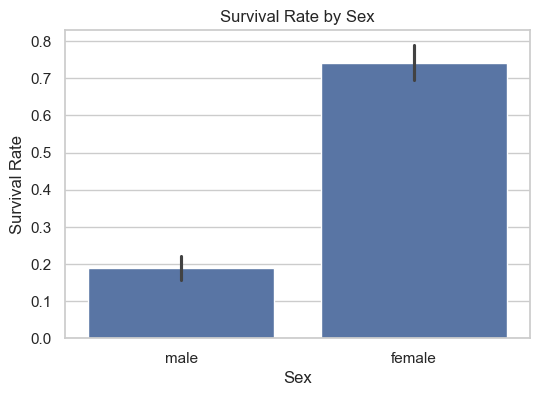

In [201]:
# Bar plot: Survival rate for each gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

**Interpretation:** Women had a much higher survival rate than men — this will likely be a strong feature for our model.

### 3.2 Survival Rate by Pclass

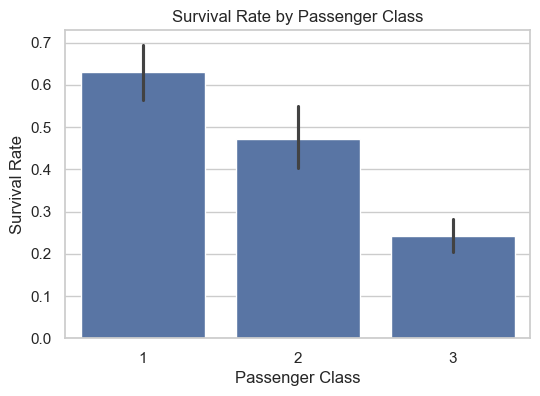

In [202]:
# Bar plot: Survival by passenger class (1st, 2nd, 3rd)
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

**Interpretation:** First-class passengers had a much higher survival rate — possibly due to better cabin location and evacuation priority.

### 3.3 Age Distribution by Survival

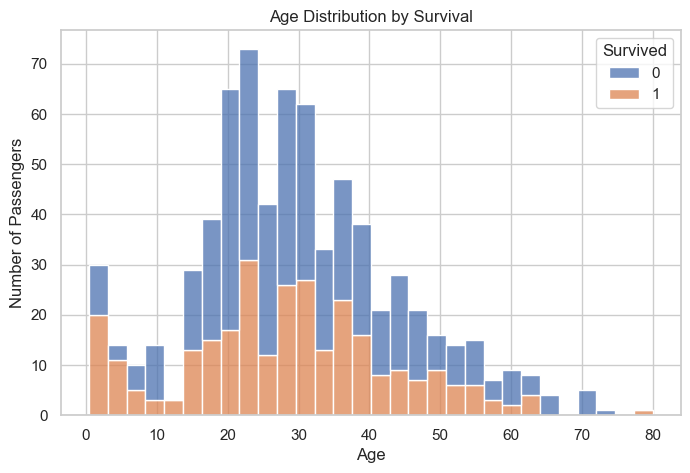

In [203]:
# Histogram: Age distribution separated by survival
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=False, bins=30)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

**Interpretation:** Many younger passengers survived — especially children. We may also consider creating an `is_child` feature later.

### 3.4 Embarked vs Survival

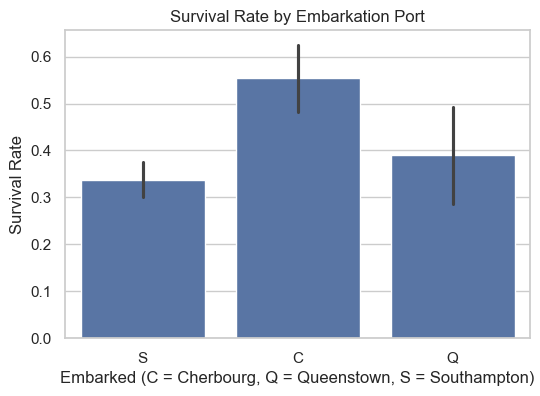

In [204]:
# Bar plot: Survival rate by port of embarkation
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Survival Rate")
plt.show()

**Interpretation:** Passengers who boarded at Cherbourg (`C`) had the highest survival rate. This may be correlated with `Pclass`.

## Step 6: Preprocessing the Titanic Dataset

Before training our model, we need to clean and prepare the data:

### What we'll do:
1. **Handle missing values**
   - Fill missing `Age` with median
   - Drop the `Cabin` column (too many missing values)
   - Drop rows with missing `Embarked` (only 2 rows)
2. **Encode categorical features**
   - Convert `Sex` and `Embarked` using `LabelEncoder`
3. **Drop unused columns**
   - Remove `Name`, `Ticket`, `PassengerId` (not useful for prediction)
4. **Split features (`X`) and target (`y`)**


### 6.1 Handle missing values

In [205]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop 'Cabin' due to excessive missing values
df.drop(columns=['Cabin'], inplace=True)

# Drop rows with missing 'Embarked' (only 2 rows)
df.dropna(subset=['Embarked'], inplace=True)

### 6.2 Encode categorical variables using LabelEncoder

Most machine learning models (like Decision Trees in scikit-learn) only work with numbers — they can’t understand text like `male`, `female`, `S`, or `C`.

So, we use `LabelEncoder` to convert text categories into numeric codes, like:

`male` → 1, `female` → 0

`S` → 2, `C` → 0, `Q` → 1

This allows the algorithm to process and compare the values during training.

In [206]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])  # male = 1, female = 0
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])  # S = 2, C = 0, Q = 1

### 6.3 Drop columns not useful for prediction

We will drop `Name`, `Ticket`, `PassengerId` columns since they are not used in our model training.

In [207]:
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

### 6.4 Define feature matrix `X` and target vector `y`

In [208]:
# Step 4: Define feature matrix X and target vector y
X = df.drop('Survived', axis=1)  # All features
y = df['Survived']  # Target variable

# Show cleaned data
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


## Step 7: Train a Decision Tree with Scikit-learn

Now that our dataset is clean and numeric, we can train a Decision Tree model.

We'll follow these steps:
1. Split the data into **training and testing sets**
2. Train a `DecisionTreeClassifier` using the training set
3. Evaluate it on the test set (next step)

We'll use **entropy** as the criterion, which means the tree will split based on **information gain**.

### 7.1 Split the data into train and test sets

In [209]:
# 80% for training, 20% for testing (random_state = 42 ensures reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7.2 Create and train the decision tree classifier

In [210]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Step 8: Visualize the Decision Tree & Evaluate Its Performance

Now that we’ve trained the model, we’ll:
1. **Visualize the tree** to see how it splits the data
2. **Evaluate performance** using:
   - Accuracy
   - Precision
   - Recall
   - F1-score
   - Confusion matrix

This helps us understand how well the model predicts survival and where it might be going wrong.

### 8.1 Visualize the Decision Tree

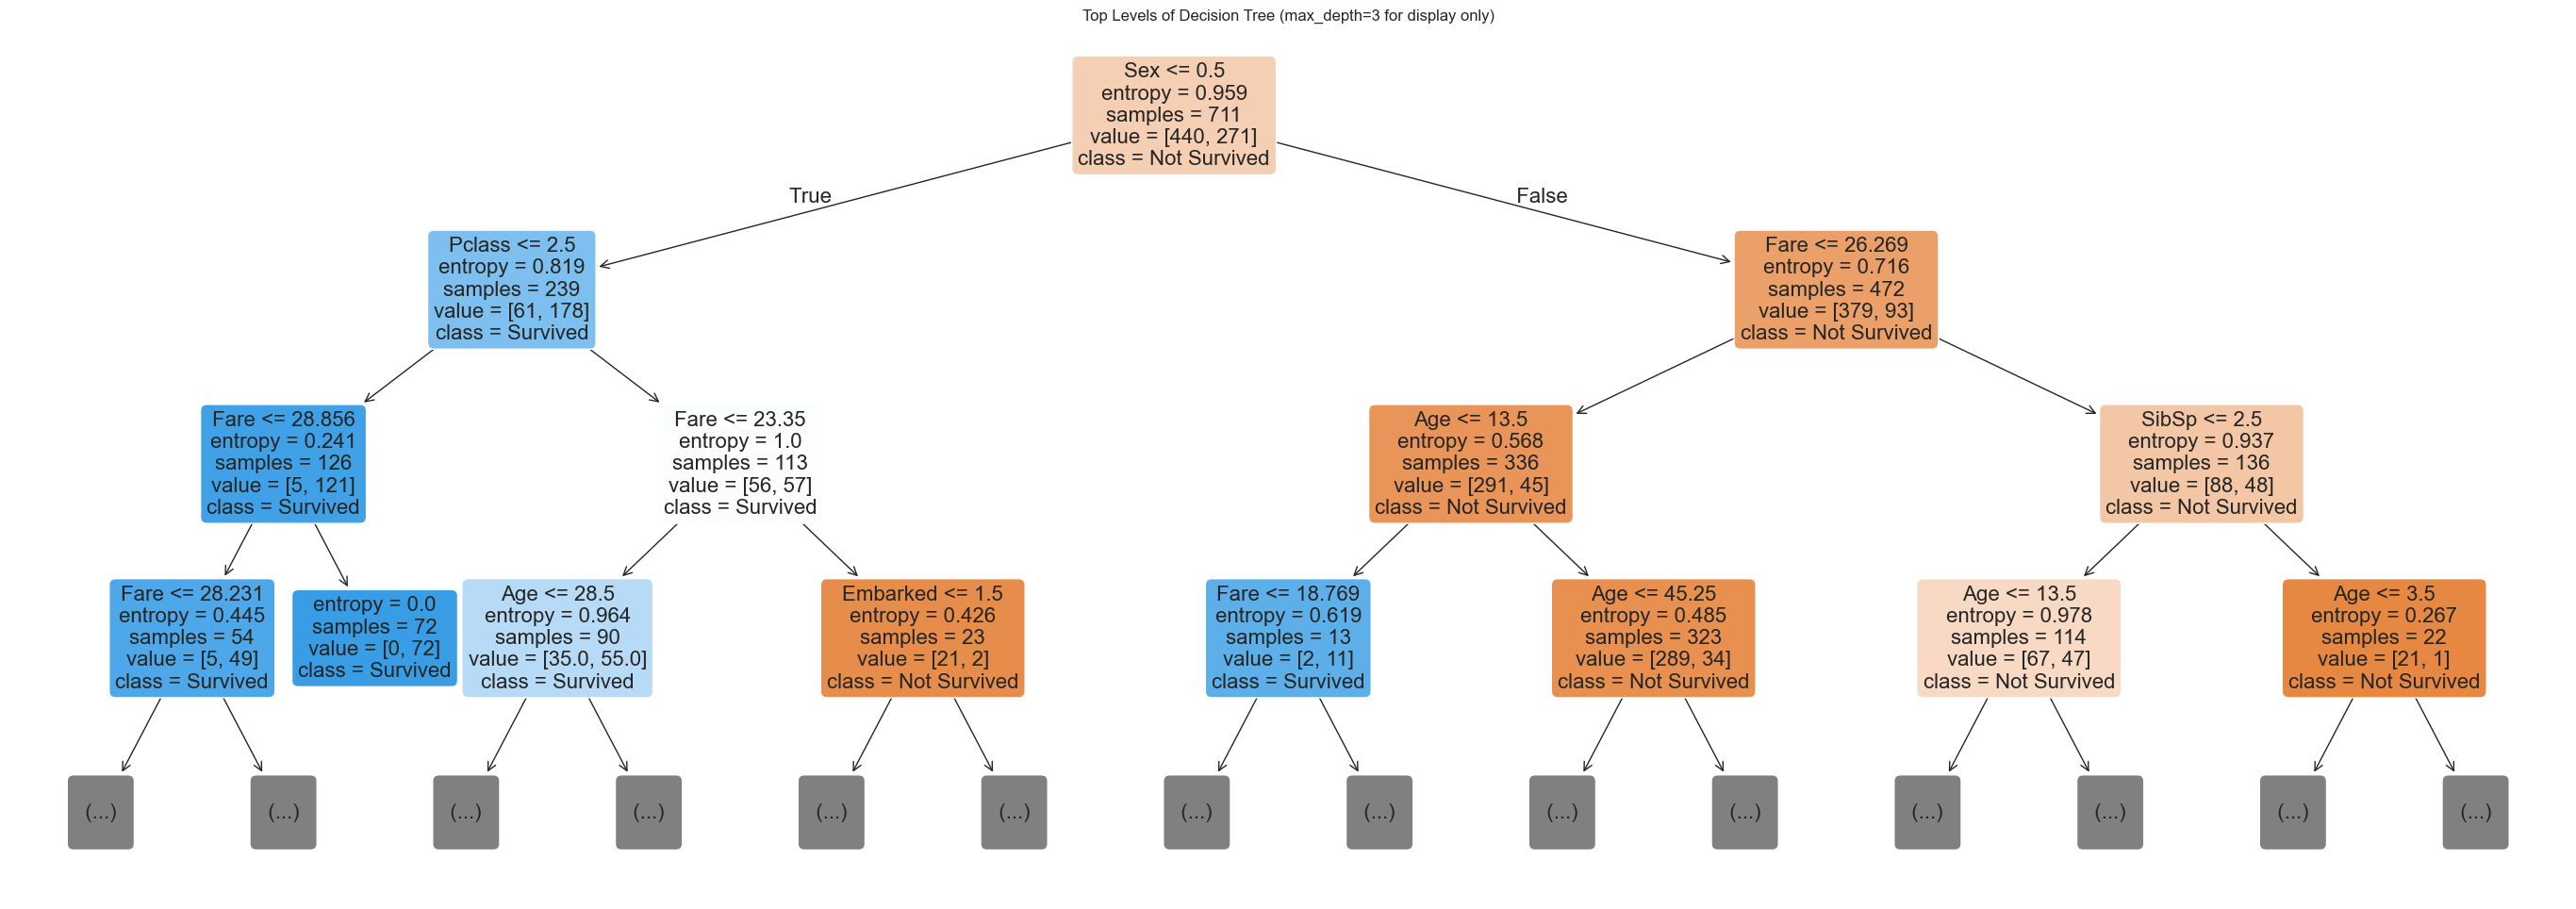

In [211]:
# Plot only the top 3 levels of the tree for readability
plt.figure(figsize=(35, 12))

plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    fontsize=16,
    max_depth=3  # Only show the top 3 levels
)

plt.title("Top Levels of Decision Tree (max_depth=3 for display only)")
plt.show()

### 8.2 Evaluate the Model on Test Set

In [212]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"]))

# Show confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7528089887640449

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.82      0.77      0.79       109
    Survived       0.67      0.72      0.69        69

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178

Confusion Matrix:
[[84 25]
 [19 50]]


### Evaluation Summary

After training and testing our decision tree model, we evaluated its performance using several metrics:

#### Overall Accuracy
- The model achieved an **accuracy of 75.3%**, meaning it correctly predicted survival for about 3 out of 4 passengers in the test set.

#### Classification Report

| Class           | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **Not Survived** (0) | 0.82      | 0.77   | 0.79     | 109     |
| **Survived** (1)     | 0.67      | 0.72   | 0.69     | 69      |

- **Precision** (for Survived = 0.67): When the model predicts someone survived, it’s correct 67% of the time.
- **Recall** (for Survived = 0.72): Of all passengers who actually survived, 72% were correctly identified.
- **F1-Score** balances precision and recall, giving a score of **0.69** for the survived class.


#### Confusion Matrix

|                  | Predicted Not Survived | Predicted Survived |
|------------------|------------------------|---------------------|
| **Actual Not Survived** | 84 (✅)                | 25 (❌ false positive) |
| **Actual Survived**     | 19 (❌ false negative) | 50 (✅)                 |

- **False Positives** (25): Predicted survived, but didn't.
- **False Negatives** (19): Predicted not survived, but actually did.

#### Summary

- The model performs **better on `Not Survived`** due to more training examples and clearer patterns.
- It has slightly lower performance on predicting `Survived`, which is common when the dataset is imbalanced.
- We can improve this further using:
  - Pruning and tuning hyperparameters
  - Feature engineering
  - Balancing the dataset

## Step 9: Apply Pruning (Control Tree Depth)

Decision trees can easily overfit the training data by growing too deep and capturing noise instead of meaningful patterns.

To prevent this, we apply **pruning** — restricting how complex the tree can get.  
The most common way is by setting **`max_depth`**, which limits how many splits (levels) the tree is allowed to make.

We'll now train a pruned version of our tree and compare its performance to the original.

In [213]:
# Train a pruned decision tree with max_depth=3
clf_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)

# Predict on test data
y_pred_pruned = clf_pruned.predict(X_test)

# Evaluate pruned model
print("Accuracy (Pruned Tree):", accuracy_score(y_test, y_pred_pruned))
print("\nClassification Report (Pruned Tree):")
print(classification_report(y_test, y_pred_pruned, target_names=["Not Survived", "Survived"]))

print("Confusion Matrix (Pruned Tree):")
print(confusion_matrix(y_test, y_pred_pruned))

Accuracy (Pruned Tree): 0.8202247191011236

Classification Report (Pruned Tree):
              precision    recall  f1-score   support

Not Survived       0.86      0.84      0.85       109
    Survived       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

Confusion Matrix (Pruned Tree):
[[92 17]
 [15 54]]


###  Evaluation of the Pruned Decision Tree

After applying pruning by setting `max_depth=3`, we retrained the model to control complexity and avoid overfitting.

#### Accuracy
- **Pruned Tree Accuracy**: **82.0%**
- This is an improvement over the unpruned model (75.3%)


#### Classification Report (Pruned Tree)

| Class           | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **Not Survived** | 0.86      | 0.84   | 0.85     | 109     |
| **Survived**     | 0.76      | 0.78   | 0.77     | 69      |

- **Precision for Survived (0.76)**: When the model says `Survived`, it’s correct 76% of the time.
- **Recall for Survived (0.78)**: It correctly identifies 78% of the actual survivors.
- **F1-Score (0.77)**: Balanced score combining precision and recall.

#### Confusion Matrix

|                  | Predicted Not Survived | Predicted Survived |
|------------------|------------------------|---------------------|
| **Actual Not Survived** | 92 (✅)                | 17 (❌ false positive) |
| **Actual Survived**     | 15 (❌ false negative) | 54 (✅)                 |

#### Summary

- Pruning led to **better generalization** with higher accuracy and more balanced precision/recall.
- The model is **simpler, interpretable, and performs better** on unseen test data.
- This demonstrates the importance of **controlling tree depth** to prevent overfitting.

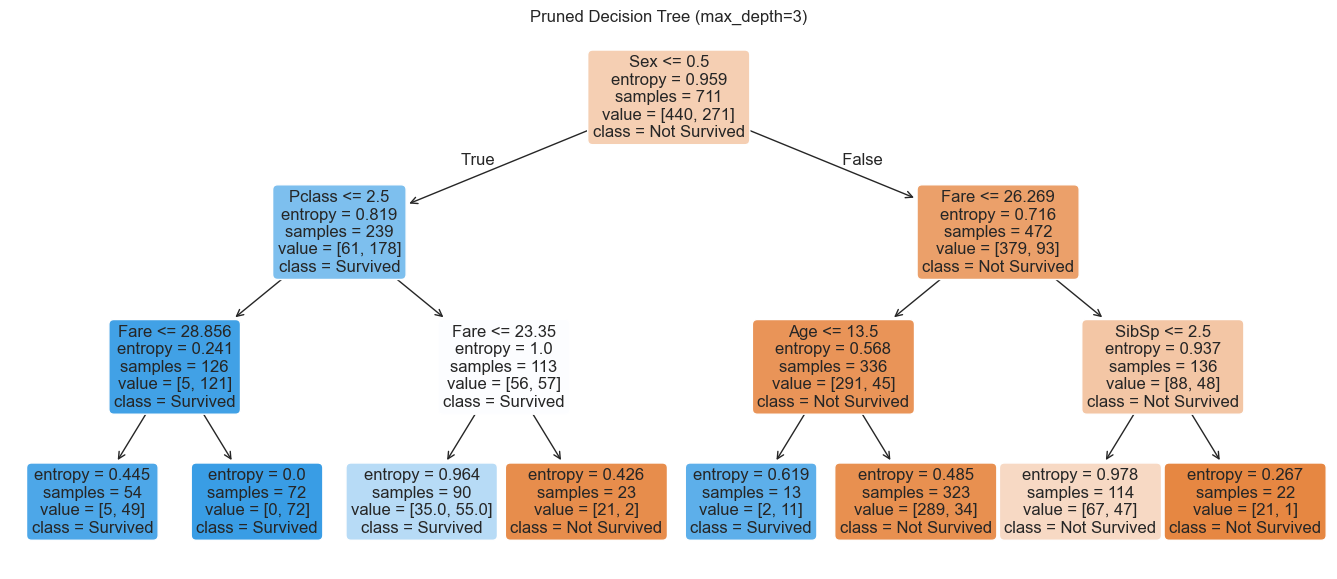

In [214]:
# Plot the pruned tree
plt.figure(figsize=(17, 7))
plot_tree(
    clf_pruned,
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()

## Final Conclusion

In this project, we built a complete Decision Tree model to predict survival on the Titanic.  
We walked through every step of the machine learning pipeline — from data loading to final evaluation.

### What We Did

1. **Loaded and explored** the Titanic dataset
2. Conducted **visual EDA** to understand relationships between features and survival
3. Performed **data cleaning and preprocessing** (handling missing values, encoding, dropping irrelevant columns)
4. Trained a **Decision Tree classifier**
5. Evaluated the model using **accuracy, precision, recall, F1-score, and confusion matrix**
6. Applied **pruning (max_depth)** to reduce overfitting and improve generalization
7. Compared the unpruned and pruned models

### Final Thoughts

- Decision Trees are powerful, intuitive, and easy to visualize.
- However, they can overfit if not controlled — which is why pruning is critical.
- Our pruned model outperformed the unpruned one with **higher accuracy (82%)** and **better class balance**.
- This project is a great foundation for exploring more advanced tree models like **Random Forests** and **Gradient Boosting**.